### Python for Finance: Simple vs Log Returns and Normality Assumption

In this tutorial we try to understand the difference between simple returns and log returns. 
We also talk about normality of financial data!

#### THE MAIN REASON

If we want to model returns using the normal distribution!

* SIMPLE RETURNS: The product of normally distributed variables is NOT normally distributed.
* LOG RETURNS: The sum of normally distributed variables DOES follow a normal distribution.

Also the log distribution bounds our stock prices at 0. Which is a nice property to have and is consistent with reality.

#### Step 1: Import dependencies

In [48]:
import datetime as dt
import pandas as pd
import numpy as np
import pylab
import seaborn as sns
import scipy.stats as stats
import yfinance as yf
import plotly.offline as pyo

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

#### Step 2: get stock market data

Choose a date range and select stock to chart. 

In [49]:
end = dt.datetime.now()
start = dt.datetime(2019,1,1)

df = yf.download('CBA.AX', start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,72.349998,72.470001,70.769997,70.970001,56.257679,2858639
2019-01-03,71.250000,71.980003,70.860001,71.839996,56.947334,3345567
2019-01-04,71.500000,71.959999,71.080002,71.889999,56.986958,3501951
2019-01-07,72.500000,72.989998,72.449997,72.570000,57.525993,2615597
2019-01-08,72.379997,72.800003,72.004997,72.470001,57.446732,2363648


#### Part 1: Simple vs Log Returns

calculate daily simple returns

In [50]:
simple_returns = df.Close.pct_change().dropna()
simple_returns

Date
2019-01-03    0.012259
2019-01-04    0.000696
2019-01-07    0.009459
2019-01-08   -0.001378
2019-01-09   -0.001932
                ...   
2024-04-08    0.001271
2024-04-09    0.008123
2024-04-10   -0.007889
2024-04-11   -0.011843
2024-04-12   -0.004880
Name: Close, Length: 1335, dtype: float64

For multi period k returns

Plot financial data and look at first and last share prices.

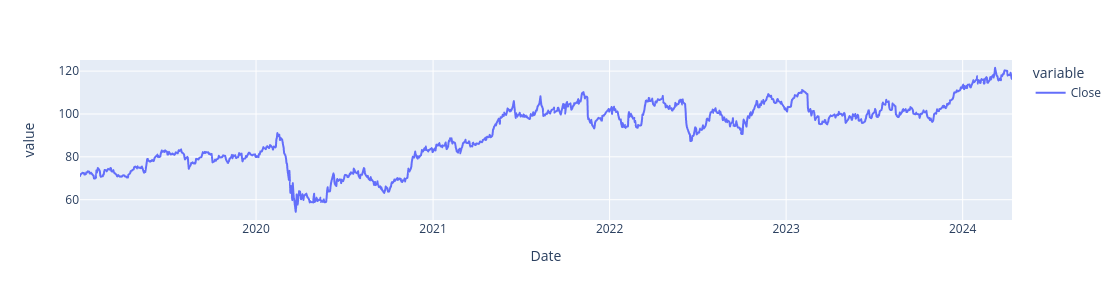

In [51]:
df.Close.plot().update_layout(autosize=False, width=500, height=300)

In [52]:
print('First', df.Close[0], 'Last', df.Close[-1])

First 70.97000122070312 Last 116.23999786376953


/tmp/ipykernel_3964/223727047.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Use simple returns and attempt to compute final price from starting price over time horizon

In [53]:
simple_returns.mean()

0.0004843831193600685

In [54]:
df.Close[0]*(1+simple_returns.mean())**len(simple_returns)

/tmp/ipykernel_3964/231269505.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



135.47026518538794

In [55]:
df['Close'][0] * np.prod([(1+Rt) for Rt in simple_returns])

/tmp/ipykernel_3964/135071503.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



116.2399978637694

#### Log Returns

Compute log returns in python

In [56]:
log_returns = np.log(df.Close/df.Close.shift(1)).dropna()
log_returns

Date
2019-01-03    0.012184
2019-01-04    0.000696
2019-01-07    0.009414
2019-01-08   -0.001379
2019-01-09   -0.001934
                ...   
2024-04-08    0.001270
2024-04-09    0.008090
2024-04-10   -0.007921
2024-04-11   -0.011914
2024-04-12   -0.004892
Name: Close, Length: 1335, dtype: float64

In [57]:
log_returns.mean()

0.00036958781359333837

In [58]:
df.Close[0]*np.exp(log_returns.mean() * len(log_returns))

/tmp/ipykernel_3964/2515397044.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



116.23999786376922

#### Histogram of log returns

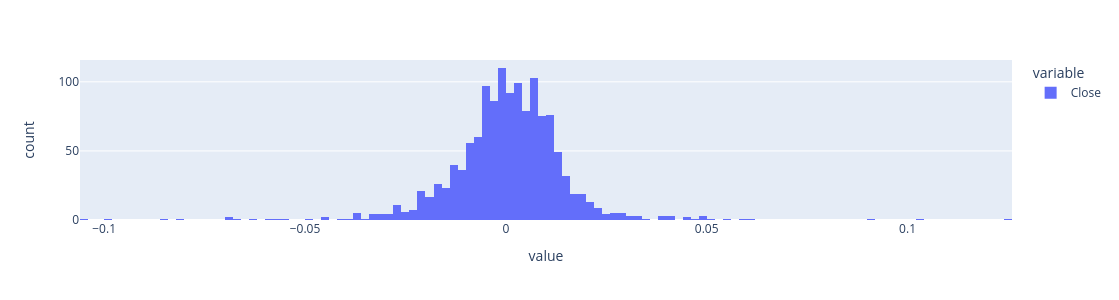

In [59]:
log_returns.plot(kind='hist').update_layout(autosize=False, width=500, height=300)

#### Is normality a good assumption for financial data?

The assumption that prices or more accurately log returns are normally distributed!

In [60]:
log_returns_sorted = log_returns.tolist()
log_returns_sorted.sort()
worst = log_returns_sorted[0]
best = log_returns_sorted[-1]

std_worst = (worst - log_returns.mean())/log_returns.std()
std_best = (best - log_returns.mean())/log_returns.std()

print('Std dev. worst %.2f best %.2f' %(std_worst, std_best))
print('Std dev. worst %.15f best %.20f' %(stats.norm(0,1).pdf(std_worst), stats.norm(0,1).pdf(std_best)))

Std dev. worst -6.98 best 8.19
Std dev. worst 0.000000000010398 best 0.00000000000000105524


#### Part 2: Testing for Normality

https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411

#### Q-Q or Quantile-Quantile Plots

It plots two sets of quantiles against one another i.e. theoretical quantiles against the actual quantiles of the variable. 

Q-Q Plot


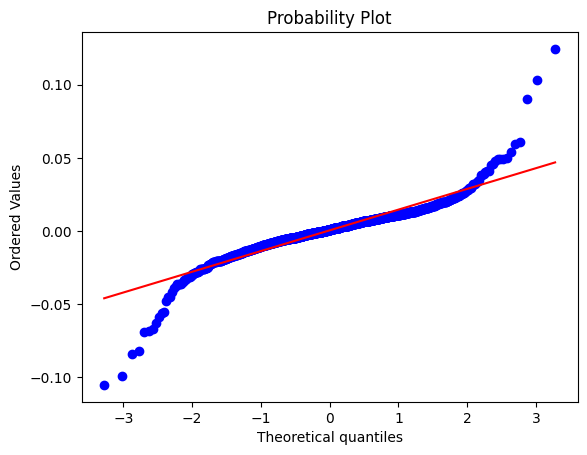

In [61]:
stats.probplot(log_returns, dist='norm', plot=pylab)
print('Q-Q Plot')

#### Box Plots

Box Plot also know as a box and whisker plot is another way to visualize the normality of a variable. It displays the distribution of data based on a five-number summary i.e. minimum, first quartile (Q1), median(Q2), third quartile(Q3) and maximum. 

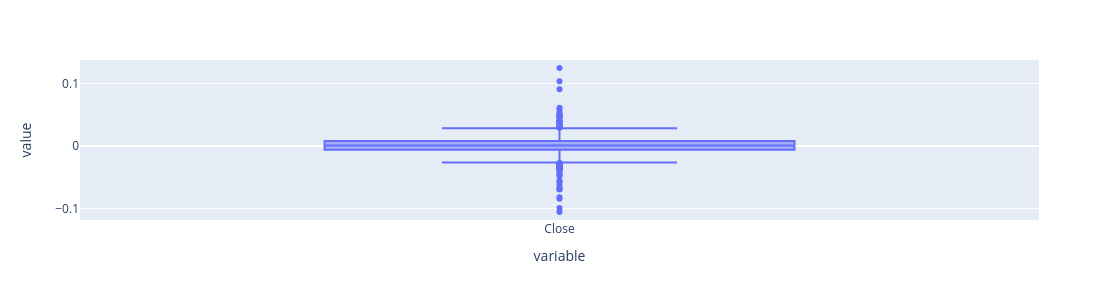

In [62]:
log_returns.plot(kind='box').update_layout(autosize=False, width=500, height=300)

#### Hypothesis Testing/Statistical Inference ?

Why would you do it? 

**Kolmogorov Smirnov Test**

The Kolmogorov Smirnov Test computes the distances between the empirical distribution and the theoretical distribution and defines the test statistic as the supremum of the set of those distances. 

The Test Statistic of the KS Test is the Kolmogorov Smirnov Statistic, which follows a Kolmogorov distribution if the null hypothesis is true. If the observed data perfectly follow a normal distribution, the value of the KS statistic will be 0. The P-Value is used to decide whether the difference is large enough to reject the null hypothesis:

The advantage of this is that the same approach can be used for comparing any distribution, not necessarily the normal distribution only. 

In [63]:
ks_stat, p_value = stats.kstest(log_returns, 'norm')
print(ks_stat, p_value)
if p_value > 0.05:
    print("Probability Guassian")
else:
    print("Probability Not Gaussian")

0.4754810558154787 9.516939451947059e-278
Probability Not Gaussian


#### Shapiro Wilk Test

The Shapiro Wilk test is the most powerful test when testing for a normal distribution. It has been developed specifically for the normal distribution and it cannot be used for testing against other distributions like for example the KS test. 

In [64]:
sw_stat, p_value = stats.shapiro(log_returns)
print(sw_stat, p_value)
if p_value > 0.05:
    print("Probability Guassian")
else:
    print("Probability Not Gaussian")

0.8756569075632276 2.3859689400286103e-31
Probability Not Gaussian
